<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [9]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
#only columns sex and salary
df_new = df[['sex','salary']]

In [11]:
df_new.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [12]:
df_new.tail()

,sex,salary
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329
396,Male,81035


Finding the Median salary for all males

In [13]:
#new variable df_male to isolate the Male sex
df_male = df_new[df_new['sex'] == 'Male']

In [14]:
#Median salary for all males
df_male['salary'].median()

108043.0

Finding the Median salary for all females

In [15]:
#df_female includes only the female sex
df_female = df_new[df_new['sex'] == 'Female']
df_female['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [16]:
#Mean salary of all males
male = df_male['salary'].mean()
print(male)

115090.41899441341


In [17]:
#Mean salary of all females
female = df_female['salary'].mean()
print(female)

101002.41025641025


In [18]:
# The difference between the mean salaries of male and female
male - female

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [19]:
#Creating a new data frame that only has the columns for yrs.service and salary
df_exp = df[['yrs.service', 'salary']]

In [20]:
#exp_20_plus is a new variable for only people who have 20 years of experience or more
exp_20_plus = df_exp['yrs.service'] >= 20

In [21]:
exp_20_plus

0      False
1      False
2      False
3       True
4       True
       ...  
392     True
393    False
394     True
395    False
396    False
Name: yrs.service, Length: 397, dtype: bool

In [22]:
#creating a new variable exp_mean to find the mean salary of people with 20 years of experience or more
exp_mean = df_exp[exp_20_plus]
exp_mean

,yrs.service,salary
3,39,115000
4,41,141500
6,23,175000
7,45,147765
8,20,119250
...,...,...
384,21,125192
386,27,139219
388,36,119450
392,30,103106


In [23]:
#the mean salary of people with 20 years of experience or more
exp_mean['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [24]:
#creating a variable exp_20_less for people who have less than 20 years of experience
exp_20_less = df_exp['yrs.service'] < 20

In [25]:
exp_20_less_mean = df_exp[exp_20_less]
exp_20_less_mean

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
5,6,97000
9,18,129000
...,...,...
390,19,166605
391,19,151292
393,19,150564
395,15,95329


In [26]:
#the mean salary of people with less than 20 years of experience
exp_20_less_mean['salary'].mean()

107940.50416666667

In [27]:
#difference in salaries of ppl who have 20+ yrs of exp vs less than 20 years of exp 
exp_mean['salary'].mean() - exp_20_less_mean['salary'].mean()

14580.151884288745

People who have salary of greater than or equal to 200,000

In [28]:
#creating a new variable greater_salary to find people who have a salary greater than or equal to $200,000
greater_salary = df_exp['salary'] >= 200000
df_exp[greater_salary]

,yrs.service,salary
43,38,231545
249,7,204000
364,43,205500


Your Findings here...


# Rename values, subset columns, etc

In [29]:
drop_cols = ['Unnamed: 0', 'discipline', 'yrs.since.phd']
df.drop(drop_cols, inplace=True, axis=1)
df

,rank,yrs.service,sex,salary
0,Prof,18,Male,139750
1,Prof,16,Male,173200
2,AsstProf,3,Male,79750
3,Prof,39,Male,115000
4,Prof,41,Male,141500
...,...,...,...,...
392,Prof,30,Male,103106
393,Prof,19,Male,150564
394,Prof,25,Male,101738
395,Prof,15,Male,95329


# Create some simple visualizations showing some simple statistics

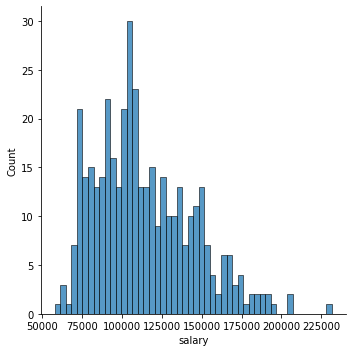

In [30]:
sns.displot(df['salary'], bins=50)
#df.iplot(kind='bar', x='yrs.service', y='salary' ) 

The bar graph above shows the simple relationship between the salary of the professors and the amount of people with the same salary. As you can see the majority of the professor's salary fall around 80k to 110k.

In [31]:
df.iplot(kind='scatter', x='yrs.service', y='salary', mode='markers')

The scatter plot above shows the relationship between the years of service versus their salary. As one's experience increases one should expect their salary to increase as well. We see this is not the case via the graph because multiple professors of lower experience have the same salary or even higher than some professors with more experience.

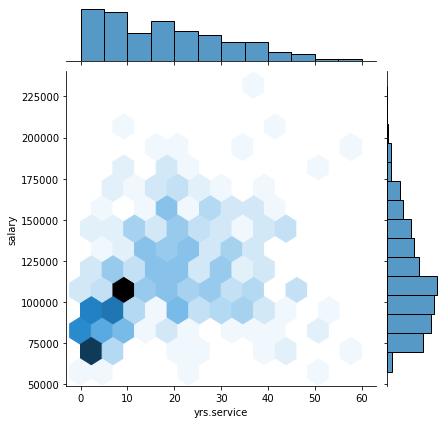

In [32]:
sns.jointplot(x='yrs.service', y='salary', data = df, kind='hex')

This is just another visualization of the relationship between years of service and salary.

In [33]:
px.box(df, x='sex', y='salary')

Looking at the boxplot above one can see that the range for female salary is smaller compared to the male salary. Even the median for female salary is less than the male median salary.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, I have concluded that the years of experience a professor has has little correlation with their average salary. I also discovered that on average men have a higher salary compared to their female counterpart. 